# Part 5 of 2D Data Tracks: Heat maps

This page is primarily based on the following page at the Circos documentation site:



- [5. Heat maps](????????????)



That page is found as part number 4 of the ??? part ['2D Data Tracks' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 4 by clicking [here &#8592;](2d_data_tracks_Part4.ipynb).



----



6 --- 2D Data Tracks
====================

5. Heat maps
------------

::: {#menu4}
[[Lesson](/documentation/tutorials/2d_tracks/heat_maps/lesson){.clean}]{.active}
[Images](/documentation/tutorials/2d_tracks/heat_maps/images){.normal}
[Configuration](/documentation/tutorials/2d_tracks/heat_maps/configuration){.normal}
:::

The heatmap track is a feature that combines the utility of highlights
and a 2D plot. In this track, regions of the genome are assigned a value
(e.g. density of genes) and are shown as wedges whose color is a
function of the value. The regions do not need to be of fixed size, and
larger regions are drawn before smaller ones (this happens
automatically) to avoid occlusion.

Circos will map the value of each region to a color range defined in the
color parameter. Unlike other tracks, the heatmap expects a list of
colors. The list can be explicitly defined in the track block, or you
can use the name of a color list previously defined in
[\<colors\>]{.syn-block}. For more details about color lists, see below,
and the [Configuration
File](/documentation/tutorials/configuration/configuration_files/)
section.

A typical heatmap block looks like this

```ini
<plot>
type    = heatmap
file    = data/6/snp.number.1mb.txt
# color list
color   = spectral-5-div
r1      = 0.95r
r0      = 0.80r
</plot>
```


The data format for the heatmap is the same as for other plots: chr,
start, end, value, and a list of optional parameters.

```ini
...
hs7 36975000 36999999 33
hs7 37000000 37024999 50
hs7 37025000 37049999 60 color=blue
hs7 37050000 37074999 44
...
```


Since line plots, histograms and heatmaps share the same data format,
you can chnage the type of plot without altering the data file.

### color mapping

#### default mapping

If `min` and `max` are not defined, the color of the data point will be
assigned based on its value as follows

```ini
color_index = num_colors * (value-min)/(max-min)
```


If you explicitly define `min` and `max` (one or both), then the color
value will be assigned using these values rather than the data\'s
statistics. Values falling outside the specified `min` or `max` range
will be assigned first/last colors in the list, as appropriate.

Color assignment is applied to a value range `[x,y)`.

The default mapping corresponds to `color_mapping=0`. You don\'t need to
set this parameter if you want the default mapping.

#### alternate mappings

There are two other color mapping schemes. They are illustrated in [this
image](/documentation/tutorials/2d_tracks/heat_maps/img/02.png). These
methods are design for cases where you set `min` and `max` values.

A heatmap with `n` colors will map the colors onto the range
\[`min`,`max`\] and areas outside the range as follows.

```ini
colors:  1,2,3,...,m,n   where m=n-1
```


```ini
color_mapping        min                 max
0      0  |  001122 ... mmnn  |  n  divided uniformly
1      0  |  01122  ... mmn   |  n  division at min/max boundary 1/2 size of others
2      0  |  112233 ... mm    |  n  divided uniformly, 0,n reserved for [,min] and [max,]
```


Notice that for the default `color_mapping=0` if you have only 2 colors
then the

The last scheme `color_mapping=2` is useful when you want to reserve the
first and last colors to regions of the heatmap below/above the plot
`min` and `max` values. Typical use of this would be

```ini
color         = black,spectral-5-div,grey
color_mapping = 2
```


where `black` would be assigned to values \<`min` and grey to values
≥`max`.

If you want to precisely control mapping then use rules.

```ini
<rules>
<rule>
condition     = var(value) < 0.5
color         = black
</rule>
<rule>
condition     = var(value) > 9.5
color         = grey
</rule>
</rules>
```


#### non-linear mapping

By default, the mapping between value and color is done linearly using
the expression. If you set `scale_log_base`, the mapping will be
logarithmic. Now, instead of index `i` being mapped to values from `x_i`
to `x_j`, it is mapped onto

```ini
min + (x_i-min)/(max-min) ^ 1/scale_log_base ... min + (x_j-min)/(max-min) ^ 1/scale_log_base
```


If `scale_log_base<1`, the dynamic range of color mapping of small
values will be increased. If `scale_log_base>1`, then dynamic range of
large values will be increased.

The `scale_log_base` parameter is useful when data are skewed.

### using color lists

Heatmaps are best used with predefined color lists. To learn how to
define lists, see [Configuration
File](/documentation/tutorials/configuration/configuration_files/)
section.

Instead of explicitly listing colors for the heatmap, use the name of
the color list for the `color` parameter.

For example, the `spectral-11-div` list was defined in
`etc/brewer.conf`. It is a list of the 11-color spectral diverging
Brewer palette. To use the list,

```ini
color = spectral-11-div
```


You can combine lists to extend the color range of the heat map. Below
the yellow-orange-red palette (a reversed version) is concatenated with
the yellow-green-blue palette.

```ini
color = ylorrd-9-seq-rev,ylgnbu-9-seq
```


You can also combine colors and lists

```ini
color = black,ylorrd-9-seq-rev,white,ylgnbu-9-seq,grey
```


### pattern fills

In addition to setting the color of a value, you can specify a pattern
fill. Think of the pattern as an independent encoding---analogous to
`color` and `color_mapping` you can use `pattern` and `pattern_mapping`.

For example, to make values in the first half of their range filled with
vertical lines and as horizontal lines in the second half,

```ini
pattern = vline,hline
```


To make regions with values `<min` filled with vertical lines and those
with `≥max` as horizontal lines

```ini
pattern         = vline,solid,hline
pattern_mapping = 2
```


For a list of patterns, see `etc/patterns.conf`{.syn-include}. You can
always make your own. Look at the pattern images in
`etc/tiles`{.syn-include}.

### color legend

Circos doesn\'t yet draw color legends. You can get a list of the color
encoding by using `-debug_group legend`.

```ini
≥ circos -conf ... -debug_group legend
...
debuggroup legend 3.01s track_0  -inf 2000.000   inf 0 spectral-9-div-1 213,62,79
debuggroup legend 3.01s track_0 2000.000 29555.556 27555.556 0 spectral-9-div-1 213,62,79
debuggroup legend 3.01s track_0 29555.556 57111.111 27555.556 1 spectral-9-div-2 244,109,67
debuggroup legend 3.01s track_0 57111.111 84666.667 27555.556 2 spectral-9-div-3 253,174,97
debuggroup legend 3.01s track_0 84666.667 112222.222 27555.556 3 spectral-9-div-4 254,224,139
debuggroup legend 3.01s track_0 112222.222 139777.778 27555.556 4 spectral-9-div-5 255,255,191
debuggroup legend 3.01s track_0 139777.778 167333.333 27555.556 5 spectral-9-div-6 230,245,152
debuggroup legend 3.01s track_0 167333.333 194888.889 27555.556 6 spectral-9-div-7 171,221,164
debuggroup legend 3.01s track_0 194888.889 222444.444 27555.556 7 spectral-9-div-8 102,194,165
debuggroup legend 3.01s track_0 222444.444 250000.000 27555.556 8 spectral-9-div-9 50,136,189
debuggroup legend 3.01s track_0 250000.000  +inf   inf 8 spectral-9-div-9 50,136,189
...
debuggroup legend 6.73s track_8  -inf 0.000   inf 0 hline 0,0,0
debuggroup legend 6.73s track_8 0.000 10.000 10.000 1 solid 0,0,0
debuggroup legend 6.73s track_8 10.000  +inf   inf 2 vline 0,0,0
debuggroup legend 6.96s track_9  -inf 2.000   inf 0 black 0,0,0
...
```


----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/6/5/

/home/jovyan/circos-tutorials-0.67/tutorials/6/5


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.31s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.31s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/6/5
debuggroup summary 0.31s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.31s loading configuration from file circos.conf
debuggroup summary 0.31s found conf file circos.conf
debuggroup summary 0.50s debug will appear for these features: output,summary
debuggroup summary 0.50s bitmap output image ./circos.png
debuggroup summary 0.50s SVG output image ./circos.svg
debuggroup summary 0.50s parsing karyotype and organizing ideograms
debuggroup summary 0.60s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.60s applying global and local scaling
debuggroup summary 0.60s allocating image, colors and brushes
debuggroup summary 2.50s drawing 3 ideograms of total size 472,449,998
debuggroup summary 2.50s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized val

View the plot in this page using the following cell.

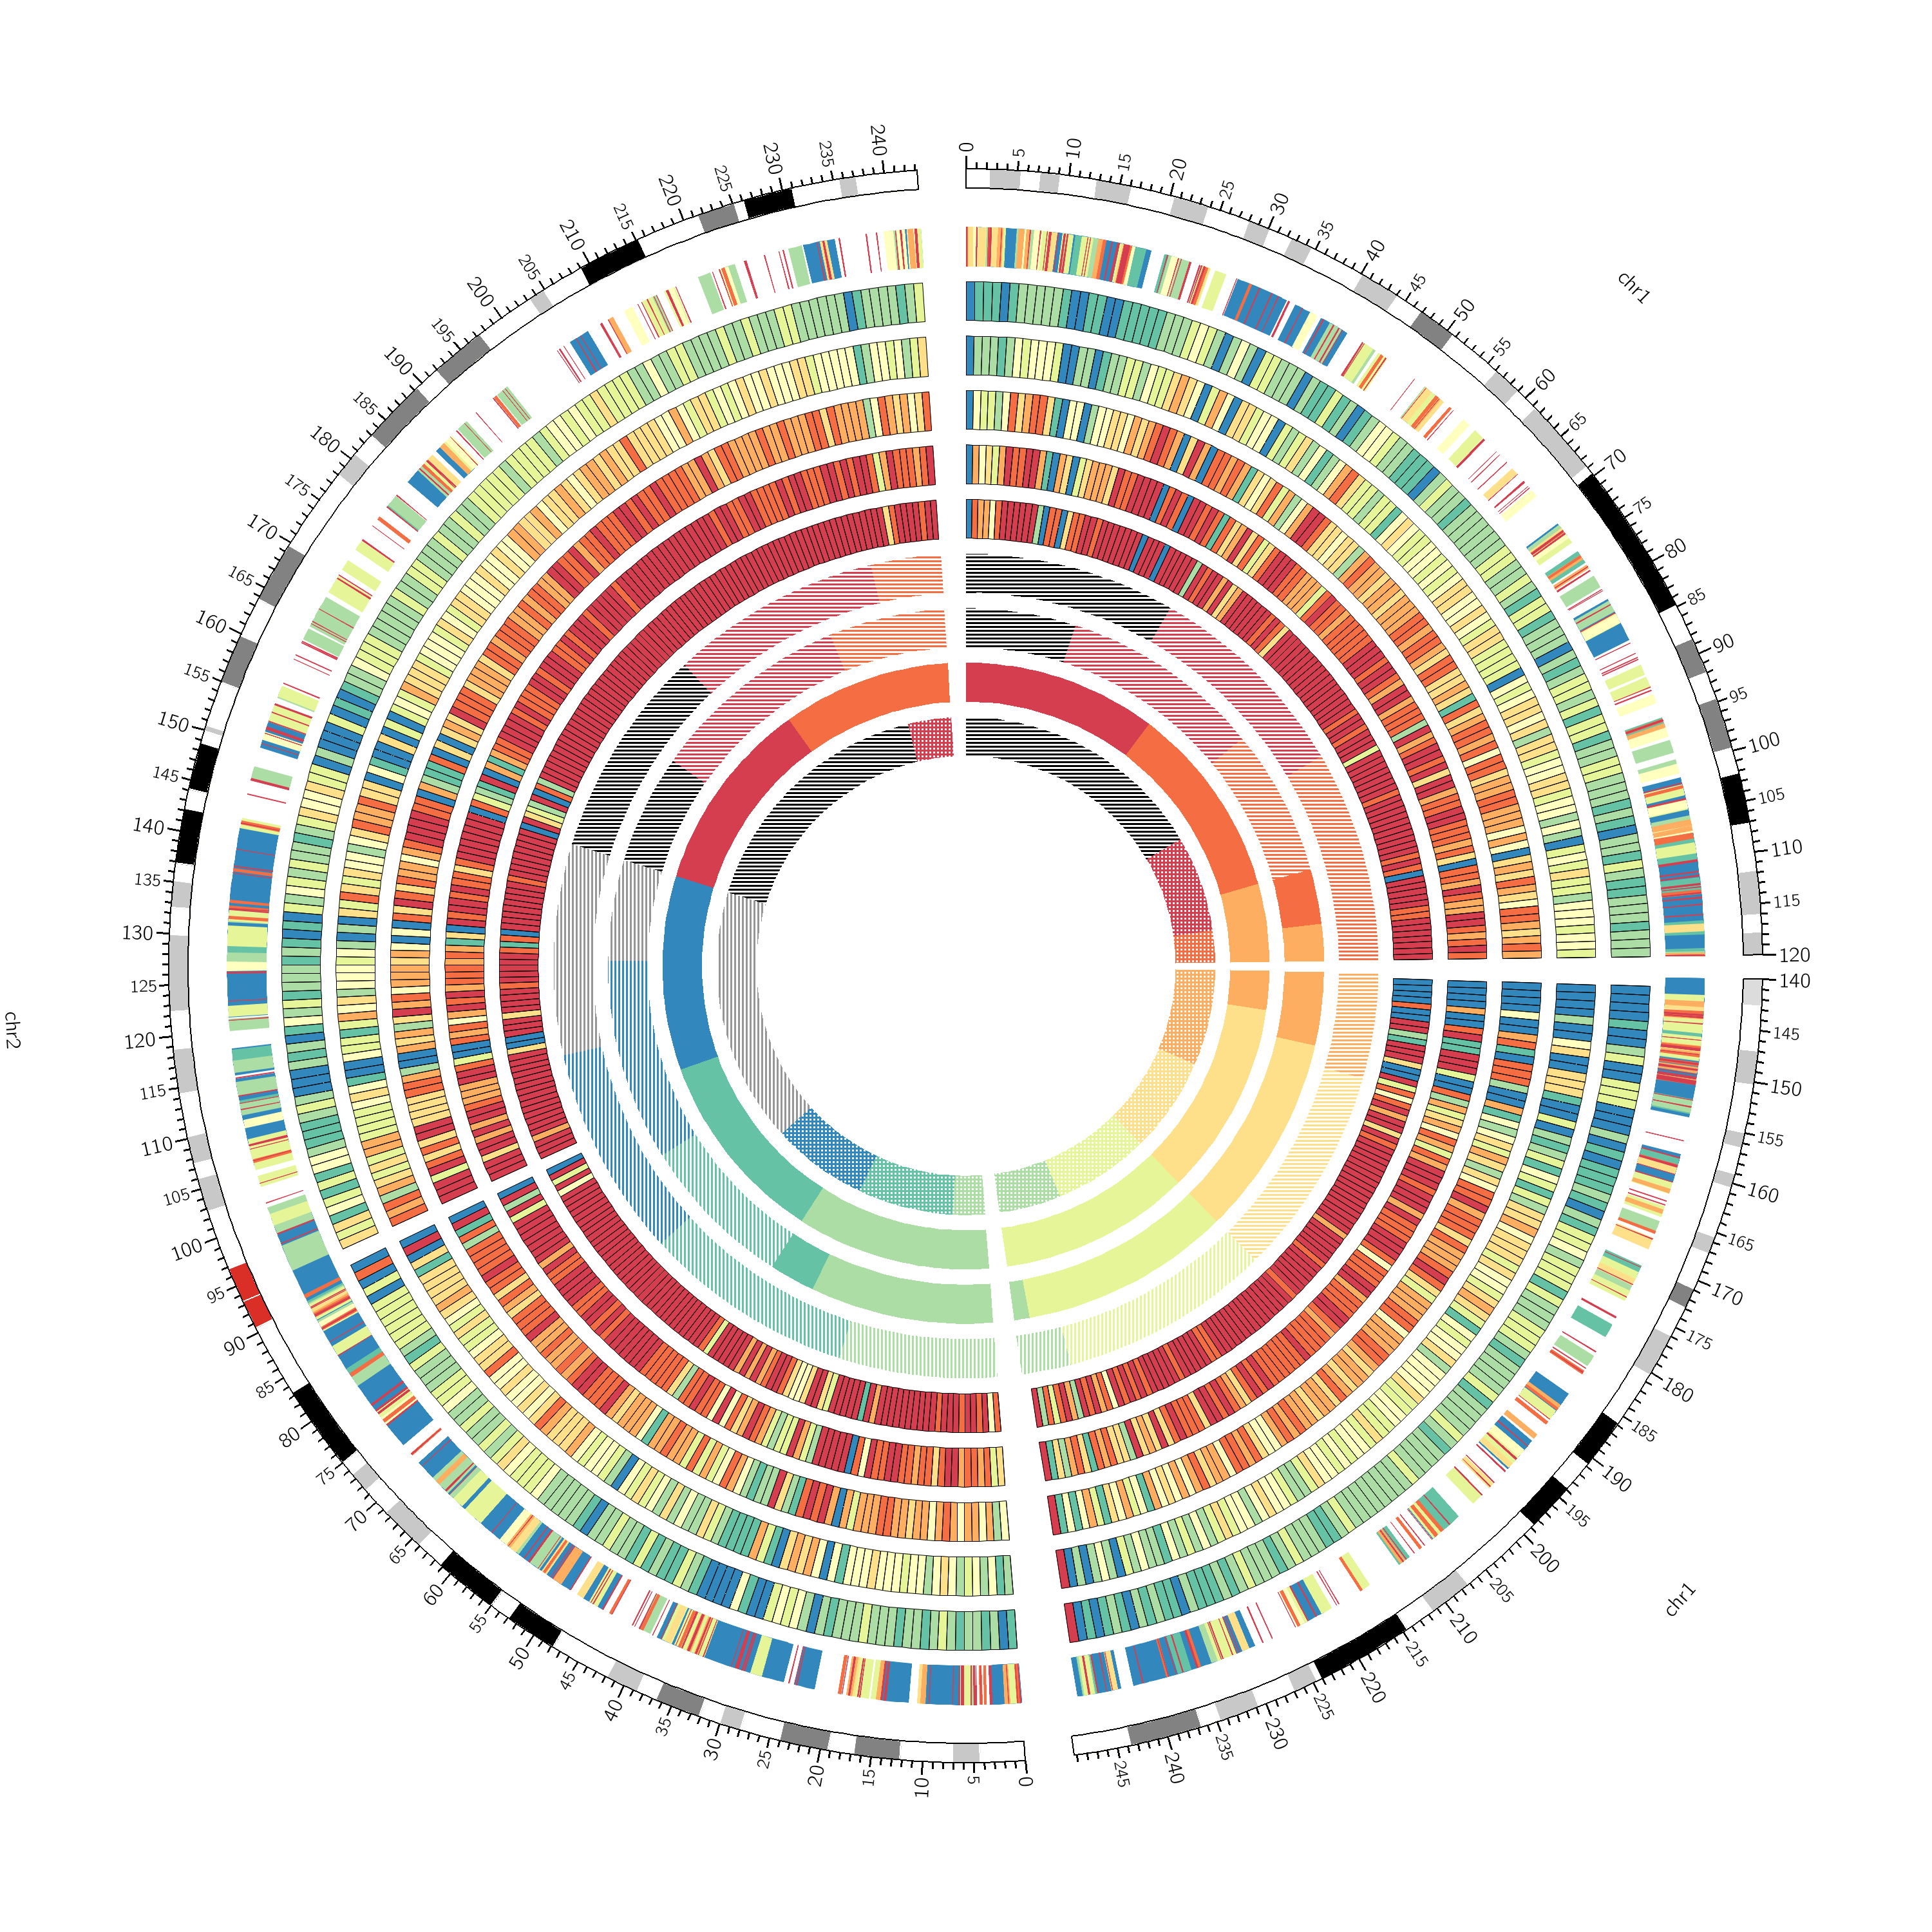

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the 2D Data Tracks series by clicking [here &#10145;](2d_data_tracks_Part6.ipynb).

----